# Text Mining 
## Hand-in Assignment 1

Student: Elin Benja Dijkstra

Studentnumber: S2696096

Deadline: 20-10-2019

## Import needed packages

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## Loading and examining the dataset

To complete the first assignment 1.1) we simply remove the categories = categories so we no longer get a subset but all 20 categories in the dataset.

In [3]:
# define our training and testing set
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)

## Training a classifier

#### Choose one of three classifiers: Naive Bayes, Stochastic Gradient Descent of LogisticRegression/Support vector classifier

In [4]:
def train_classifier(type_classifier,use_counts):   
    text_clf = None
    if type_classifier == "Naive Bayes":
        text_clf = Pipeline([
            ('vect', CountVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('clf', MultinomialNB()),
        ])
    elif type_classifier == "SGD":
        text_clf = Pipeline([
            ('vect', CountVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                  alpha=1e-3, random_state=42,
                                  max_iter=5, tol=None)),
        ])
    elif type_classifier == "Logistic Regression":
        text_clf = Pipeline([
            ('vect', CountVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('clf', LogisticRegression(penalty='l2', multi_class = "ovr")),
        ])
        
    elif type_classifier == "SVM":
        text_clf = Pipeline([
            ('vect', CountVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('clf', LinearSVC()),
        ])
        
    if use_counts:
        text_clf.steps.pop(1)
    return text_clf

## Evaluation on the test set

In [21]:
def evaluate(text_clf):
    docs_test = twenty_test.data
    predicted = text_clf.predict(docs_test)
    np.mean(predicted == twenty_test.target) 
    
    print(metrics.classification_report(twenty_test.target, predicted,
    target_names=twenty_test.target_names))
    print("Confusion matrix: ")
    cm = metrics.confusion_matrix(twenty_test.target, predicted)
    print(cm)
    
    matfig = plt.figure(figsize=(8,8))
    plt.matshow(cm, fignum=matfig.number)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    figname = str(datetime.now().hour) + str(datetime.now().minute)
    plt.savefig(figname)


In [22]:
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'vect__lowercase': (True, False),
    'vect__stop_words':  ('english', None), 
    'vect__analyzer': ['word', 'char', 'char_wb'],
    'vect__max_features': (None ,100, 1000, 10000),
    'tfidf__use_idf': (True, False)
}

In [23]:
def start_experiment():
    classifiers = ['Naive Bayes', 'SGD', 'SVM']
    for use_counts in [False, True]:
        if use_counts:
            parameters.pop('tfidf__use_idf')
        print("Use counts: " +str(use_counts))
        for classifier in classifiers:
            print(color.BOLD + '\n Evaluation for ' + str(classifier) + '\n' + color.END)
            text_clf = train_classifier(classifier, use_counts)
            text_clf.fit(twenty_train.data, twenty_train.target)  
            evaluate(text_clf)
            
            gs_clf = GridSearchCV(text_clf, parameters, cv=5, iid=False, n_jobs=-1, verbose = 3)
            print("Start gridsearch fit")
            gs_clf = gs_clf.fit(twenty_train.data, twenty_train.target)
            evaluate(gs_clf.best_estimator_)
            print("\nBest estimator found in grid search: " + str(gs_clf.best_estimator_))
            print("\nBest score found in grid search: " + str(gs_clf.best_score_))
            for param_name in sorted(parameters.keys()):
                print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))
            display(pd.DataFrame(gs_clf.cv_results_))

Use counts: False

 Evaluation for Naive Bayes

                          precision    recall  f1-score   support

             alt.atheism       0.80      0.52      0.63       319
           comp.graphics       0.81      0.65      0.72       389
 comp.os.ms-windows.misc       0.82      0.65      0.73       394
comp.sys.ibm.pc.hardware       0.67      0.78      0.72       392
   comp.sys.mac.hardware       0.86      0.77      0.81       385
          comp.windows.x       0.89      0.75      0.82       395
            misc.forsale       0.93      0.69      0.80       390
               rec.autos       0.85      0.92      0.88       396
         rec.motorcycles       0.94      0.93      0.93       398
      rec.sport.baseball       0.92      0.90      0.91       397
        rec.sport.hockey       0.89      0.97      0.93       399
               sci.crypt       0.59      0.97      0.74       396
         sci.electronics       0.84      0.60      0.70       393
                 sci.med   

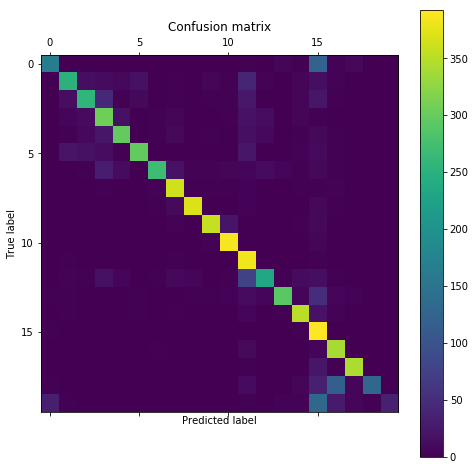

Start gridsearch fit
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 55.8min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 76.2min finished


                          precision    recall  f1-score   support

             alt.atheism       0.79      0.73      0.76       319
           comp.graphics       0.78      0.73      0.75       389
 comp.os.ms-windows.misc       0.77      0.72      0.74       394
comp.sys.ibm.pc.hardware       0.65      0.75      0.70       392
   comp.sys.mac.hardware       0.85      0.76      0.80       385
          comp.windows.x       0.86      0.79      0.82       395
            misc.forsale       0.83      0.78      0.81       390
               rec.autos       0.85      0.88      0.86       396
         rec.motorcycles       0.91      0.94      0.93       398
      rec.sport.baseball       0.86      0.91      0.88       397
        rec.sport.hockey       0.83      0.97      0.90       399
               sci.crypt       0.77      0.95      0.85       396
         sci.electronics       0.83      0.64      0.72       393
                 sci.med       0.87      0.74      0.80       396
         

<Figure size 432x288 with 0 Axes>

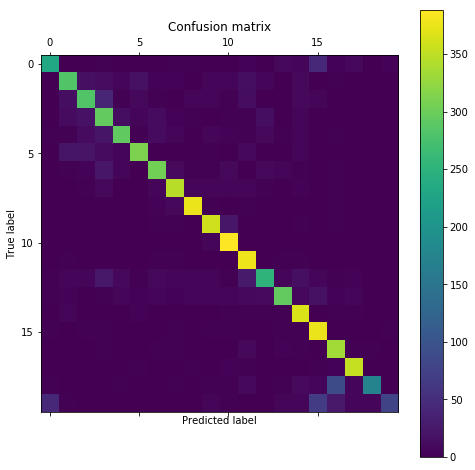


Best estimator found in grid search: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

Best s

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tfidf__use_idf,param_vect__analyzer,param_vect__lowercase,param_vect__max_features,param_vect__ngram_range,param_vect__stop_words,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.942579,0.178891,1.084498,0.053160,True,word,True,None,"(1, 1)",english,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.884971,0.883936,0.880300,0.876991,0.882927,0.881825,0.002873,2
1,5.710124,0.111902,1.170070,0.096360,True,word,True,None,"(1, 1)",None,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.848832,0.842454,0.844523,0.841593,0.843459,0.844172,0.002528,15
2,17.470267,0.235864,2.056499,0.076728,True,word,True,None,"(1, 2)",english,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.884971,0.885702,0.879417,0.883628,0.880266,0.882797,0.002517,1
3,21.119707,0.275578,2.899245,0.105344,True,word,True,None,"(1, 2)",None,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.858528,0.849073,0.852473,0.849115,0.851885,0.852215,0.003450,8
4,4.814720,0.077569,0.911562,0.067562,True,word,True,100,"(1, 1)",english,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.366241,0.381730,0.390459,0.370796,0.368071,0.375459,0.009226,49
5,5.149026,0.083855,1.009899,0.093194,True,word,True,100,"(1, 1)",None,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.286911,0.287732,0.275618,0.269912,0.279823,0.279999,0.006761,64
6,13.555142,0.303618,1.386092,0.093463,True,word,True,100,"(1, 2)",english,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.364478,0.379965,0.379859,0.367257,0.366741,0.371660,0.006802,50
7,15.728926,0.831095,1.678310,0.101049,True,word,True,100,"(1, 2)",None,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.255178,0.259047,0.249117,0.250000,0.270067,0.256682,0.007601,78
8,4.291515,0.062115,0.847134,0.087965,True,word,True,1000,"(1, 1)",english,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.734244,0.731244,0.754417,0.753540,0.749446,0.744578,0.009853,32
9,4.693047,0.095554,0.936894,0.057100,True,word,True,1000,"(1, 1)",None,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.708242,0.716240,0.734541,0.739823,0.735255,0.726820,0.012304,36



 Evaluation for SGD

                          precision    recall  f1-score   support

             alt.atheism       0.73      0.71      0.72       319
           comp.graphics       0.78      0.72      0.75       389
 comp.os.ms-windows.misc       0.73      0.78      0.75       394
comp.sys.ibm.pc.hardware       0.74      0.67      0.70       392
   comp.sys.mac.hardware       0.81      0.83      0.82       385
          comp.windows.x       0.84      0.76      0.80       395
            misc.forsale       0.84      0.90      0.87       390
               rec.autos       0.91      0.90      0.90       396
         rec.motorcycles       0.93      0.96      0.95       398
      rec.sport.baseball       0.88      0.90      0.89       397
        rec.sport.hockey       0.88      0.99      0.93       399
               sci.crypt       0.84      0.96      0.90       396
         sci.electronics       0.83      0.62      0.71       393
                 sci.med       0.87      0.86      0.

<Figure size 432x288 with 0 Axes>

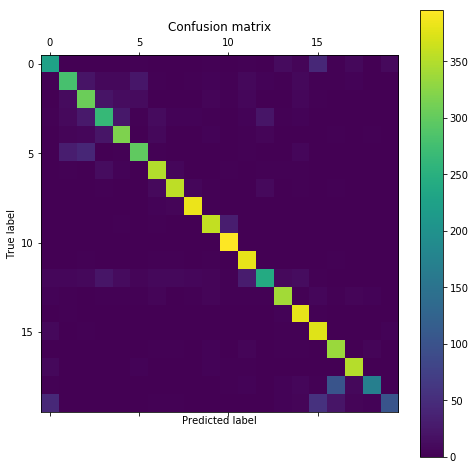

Start gridsearch fit
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 57.9min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 78.6min finished


                          precision    recall  f1-score   support

             alt.atheism       0.76      0.76      0.76       319
           comp.graphics       0.80      0.72      0.76       389
 comp.os.ms-windows.misc       0.74      0.79      0.77       394
comp.sys.ibm.pc.hardware       0.75      0.70      0.72       392
   comp.sys.mac.hardware       0.86      0.82      0.84       385
          comp.windows.x       0.84      0.77      0.81       395
            misc.forsale       0.85      0.91      0.88       390
               rec.autos       0.93      0.90      0.92       396
         rec.motorcycles       0.94      0.96      0.95       398
      rec.sport.baseball       0.88      0.91      0.90       397
        rec.sport.hockey       0.87      0.99      0.93       399
               sci.crypt       0.80      0.96      0.87       396
         sci.electronics       0.85      0.65      0.73       393
                 sci.med       0.89      0.83      0.86       396
         

<Figure size 432x288 with 0 Axes>

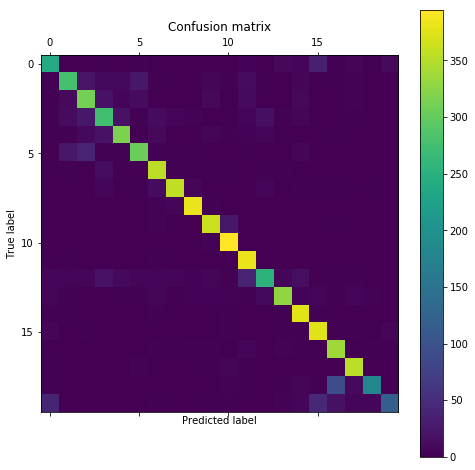


Best estimator found in grid search: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal'

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tfidf__use_idf,param_vect__analyzer,param_vect__lowercase,param_vect__max_features,param_vect__ngram_range,param_vect__stop_words,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.365648,0.246444,0.947665,0.039929,True,word,True,None,"(1, 1)",english,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.889819,0.892321,0.886926,0.889381,0.892683,0.890226,0.002107,6
1,5.400555,0.056481,1.056972,0.064113,True,word,True,None,"(1, 1)",None,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.887175,0.893645,0.882951,0.888938,0.889579,0.888457,0.003475,8
2,18.122724,0.647915,1.904306,0.063407,True,word,True,None,"(1, 2)",english,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.901719,0.902471,0.897527,0.901770,0.903769,0.901451,0.002097,2
3,23.756055,0.509659,2.695590,0.107689,True,word,True,None,"(1, 2)",None,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.902160,0.909091,0.898852,0.899558,0.906874,0.903307,0.004035,1
4,4.425362,0.272351,0.752187,0.037980,True,word,True,100,"(1, 1)",english,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.313795,0.314651,0.320671,0.326549,0.310421,0.317217,0.005718,87
5,4.841649,0.123352,0.852120,0.037239,True,word,True,100,"(1, 1)",None,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.253856,0.248014,0.256184,0.274336,0.251441,0.256766,0.009192,103
6,12.628221,0.077199,1.257038,0.079200,True,word,True,100,"(1, 2)",english,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.323931,0.300088,0.306095,0.326549,0.311308,0.313594,0.010184,88
7,15.045156,0.178601,1.603510,0.095904,True,word,True,100,"(1, 2)",None,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.239312,0.238747,0.248675,0.256637,0.249667,0.246608,0.006771,117
8,4.524895,0.076794,0.818609,0.051942,True,word,True,1000,"(1, 1)",english,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.723226,0.727714,0.733216,0.742920,0.733925,0.732200,0.006627,33
9,5.113123,0.063151,0.931508,0.040541,True,word,True,1000,"(1, 1)",None,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.706919,0.706531,0.708922,0.727876,0.724169,0.714884,0.009206,36



 Evaluation for SVM

                          precision    recall  f1-score   support

             alt.atheism       0.82      0.80      0.81       319
           comp.graphics       0.76      0.80      0.78       389
 comp.os.ms-windows.misc       0.77      0.73      0.75       394
comp.sys.ibm.pc.hardware       0.71      0.76      0.74       392
   comp.sys.mac.hardware       0.84      0.86      0.85       385
          comp.windows.x       0.87      0.76      0.81       395
            misc.forsale       0.83      0.91      0.87       390
               rec.autos       0.92      0.91      0.91       396
         rec.motorcycles       0.95      0.95      0.95       398
      rec.sport.baseball       0.92      0.95      0.93       397
        rec.sport.hockey       0.96      0.98      0.97       399
               sci.crypt       0.93      0.94      0.93       396
         sci.electronics       0.81      0.79      0.80       393
                 sci.med       0.90      0.87      0.

<Figure size 432x288 with 0 Axes>

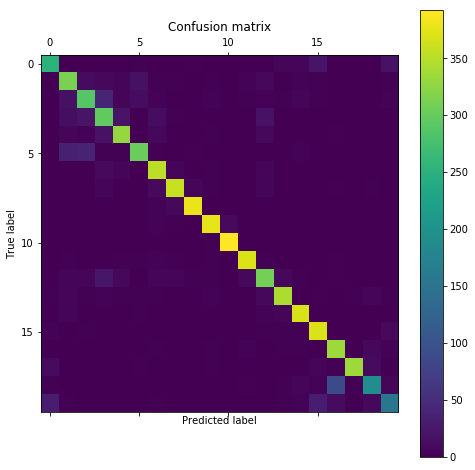

Start gridsearch fit
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 54.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 78.0min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 104.0min finished


                          precision    recall  f1-score   support

             alt.atheism       0.83      0.79      0.81       319
           comp.graphics       0.74      0.80      0.77       389
 comp.os.ms-windows.misc       0.77      0.77      0.77       394
comp.sys.ibm.pc.hardware       0.73      0.76      0.74       392
   comp.sys.mac.hardware       0.83      0.86      0.85       385
          comp.windows.x       0.87      0.76      0.81       395
            misc.forsale       0.84      0.91      0.87       390
               rec.autos       0.94      0.91      0.92       396
         rec.motorcycles       0.96      0.97      0.96       398
      rec.sport.baseball       0.91      0.94      0.93       397
        rec.sport.hockey       0.95      0.98      0.97       399
               sci.crypt       0.93      0.95      0.94       396
         sci.electronics       0.82      0.78      0.80       393
                 sci.med       0.90      0.86      0.88       396
         

<Figure size 432x288 with 0 Axes>

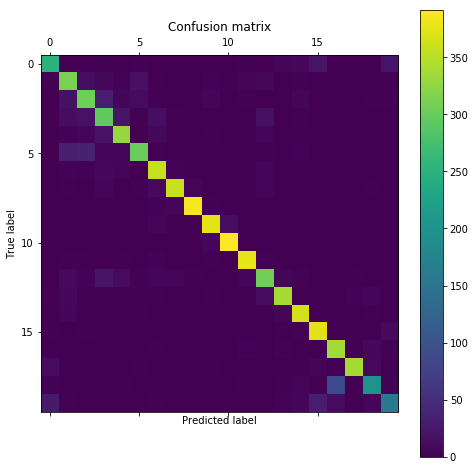


Best estimator found in grid search: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, inte

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tfidf__use_idf,param_vect__analyzer,param_vect__lowercase,param_vect__max_features,param_vect__ngram_range,param_vect__stop_words,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,8.438031,0.334156,0.987359,0.030539,True,word,True,None,"(1, 1)",english,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.918907,0.927184,0.923145,0.924779,0.927716,0.924346,0.003182,8
1,8.707109,0.509782,0.977585,0.063577,True,word,True,None,"(1, 1)",None,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.918466,0.929391,0.924028,0.923894,0.929047,0.924965,0.004013,5
2,45.225626,3.551826,2.117335,0.344432,True,word,True,None,"(1, 2)",english,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.925959,0.930715,0.925353,0.927434,0.929933,0.927879,0.002123,2
3,58.850381,3.798765,2.884683,0.317203,True,word,True,None,"(1, 2)",None,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.929484,0.929391,0.926678,0.926106,0.931707,0.928673,0.002047,1
4,6.705264,0.581331,0.801259,0.043310,True,word,True,100,"(1, 1)",english,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.375055,0.390997,0.388693,0.371239,0.377827,0.380762,0.007740,120
5,7.896078,0.392619,0.822799,0.028442,True,word,True,100,"(1, 1)",None,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.303217,0.307149,0.291961,0.304867,0.316630,0.304765,0.007909,183
6,13.518240,0.125695,1.239883,0.081921,True,word,True,100,"(1, 2)",english,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.380344,0.383054,0.380742,0.371681,0.373392,0.377843,0.004463,124
7,17.191414,0.270505,1.642208,0.070024,True,word,True,100,"(1, 2)",None,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.298810,0.299647,0.289753,0.294690,0.307317,0.298043,0.005816,187
8,5.141843,0.107053,0.871868,0.061056,True,word,True,1000,"(1, 1)",english,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.769943,0.773610,0.772527,0.784513,0.780931,0.776305,0.005492,37
9,6.143766,0.055741,0.952452,0.090169,True,word,True,1000,"(1, 1)",None,"{'tfidf__use_idf': True, 'vect__analyzer': 'wo...",0.767298,0.757282,0.762809,0.780973,0.770732,0.767819,0.007974,41


Use counts: True

 Evaluation for Naive Bayes

                          precision    recall  f1-score   support

             alt.atheism       0.79      0.77      0.78       319
           comp.graphics       0.67      0.74      0.70       389
 comp.os.ms-windows.misc       0.20      0.00      0.01       394
comp.sys.ibm.pc.hardware       0.56      0.77      0.65       392
   comp.sys.mac.hardware       0.84      0.75      0.79       385
          comp.windows.x       0.65      0.84      0.73       395
            misc.forsale       0.93      0.65      0.77       390
               rec.autos       0.87      0.91      0.89       396
         rec.motorcycles       0.96      0.92      0.94       398
      rec.sport.baseball       0.96      0.87      0.91       397
        rec.sport.hockey       0.93      0.96      0.95       399
               sci.crypt       0.67      0.95      0.78       396
         sci.electronics       0.79      0.66      0.72       393
                 sci.med    

<Figure size 432x288 with 0 Axes>

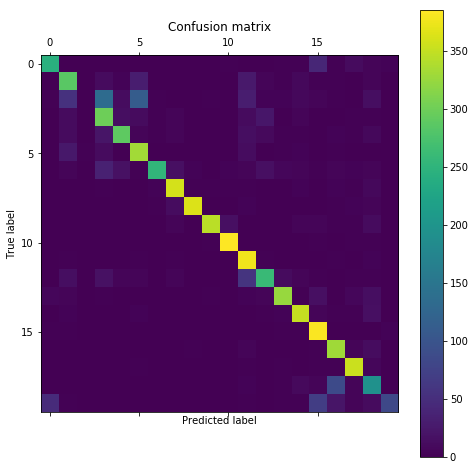

Start gridsearch fit
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 37.6min finished


                          precision    recall  f1-score   support

             alt.atheism       0.81      0.81      0.81       319
           comp.graphics       0.68      0.75      0.71       389
 comp.os.ms-windows.misc       0.91      0.34      0.49       394
comp.sys.ibm.pc.hardware       0.59      0.74      0.66       392
   comp.sys.mac.hardware       0.88      0.75      0.81       385
          comp.windows.x       0.69      0.86      0.77       395
            misc.forsale       0.89      0.73      0.80       390
               rec.autos       0.89      0.88      0.89       396
         rec.motorcycles       0.96      0.93      0.95       398
      rec.sport.baseball       0.93      0.88      0.90       397
        rec.sport.hockey       0.87      0.97      0.91       399
               sci.crypt       0.73      0.96      0.83       396
         sci.electronics       0.80      0.65      0.72       393
                 sci.med       0.84      0.81      0.82       396
         

<Figure size 432x288 with 0 Axes>

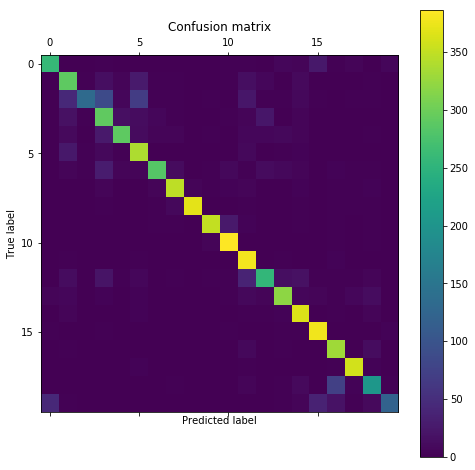


Best estimator found in grid search: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

Best score found in grid search: 0.8854479753724578
vect__analyzer: 'word'
vect__lowercase: True
vect__max_features: None
vect__ngram_range: (1, 2)
vect__stop_words

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vect__analyzer,param_vect__lowercase,param_vect__max_features,param_vect__ngram_range,param_vect__stop_words,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.334605,0.039690,0.949859,0.069029,word,True,None,"(1, 1)",english,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.868665,0.869815,0.854682,0.861947,0.867849,0.864591,0.005651,3
1,4.652755,0.073398,1.036427,0.081071,word,True,None,"(1, 1)",None,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.840458,0.841130,0.827739,0.833628,0.839911,0.836573,0.005172,7
2,14.429003,0.167132,1.622260,0.088767,word,True,None,"(1, 2)",english,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.891141,0.889232,0.878092,0.882743,0.886031,0.885448,0.004658,1
3,17.234499,0.172305,2.256165,0.109371,word,True,None,"(1, 2)",None,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.846628,0.841571,0.835689,0.829646,0.834146,0.837536,0.005935,6
4,4.039994,0.151460,0.776325,0.026421,word,True,100,"(1, 1)",english,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.327898,0.334069,0.345406,0.320354,0.332151,0.331976,0.008204,49
5,4.625428,0.030102,0.915550,0.048651,word,True,100,"(1, 1)",None,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.254738,0.275375,0.257067,0.253097,0.260310,0.260118,0.008005,53
6,12.282745,0.150717,1.232104,0.095483,word,True,100,"(1, 2)",english,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.331424,0.327008,0.332155,0.314159,0.325942,0.326138,0.006456,50
7,14.559655,0.229630,1.690876,0.107690,word,True,100,"(1, 2)",None,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.240635,0.260371,0.235424,0.239381,0.252328,0.245628,0.009277,55
8,4.244048,0.066006,0.818810,0.051950,word,True,1000,"(1, 1)",english,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.688850,0.697705,0.698322,0.710177,0.702439,0.699498,0.006938,17
9,4.634802,0.099402,0.934500,0.072565,word,True,1000,"(1, 1)",None,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.648303,0.672109,0.666961,0.679204,0.671397,0.667595,0.010413,20



 Evaluation for SGD

                          precision    recall  f1-score   support

             alt.atheism       0.75      0.65      0.70       319
           comp.graphics       0.60      0.75      0.67       389
 comp.os.ms-windows.misc       0.74      0.52      0.61       394
comp.sys.ibm.pc.hardware       0.61      0.69      0.65       392
   comp.sys.mac.hardware       0.84      0.65      0.73       385
          comp.windows.x       0.81      0.72      0.77       395
            misc.forsale       0.74      0.85      0.79       390
               rec.autos       0.87      0.77      0.82       396
         rec.motorcycles       0.81      0.91      0.86       398
      rec.sport.baseball       0.79      0.88      0.83       397
        rec.sport.hockey       0.89      0.93      0.91       399
               sci.crypt       0.83      0.90      0.87       396
         sci.electronics       0.71      0.67      0.69       393
                 sci.med       0.79      0.76      0.

<Figure size 432x288 with 0 Axes>

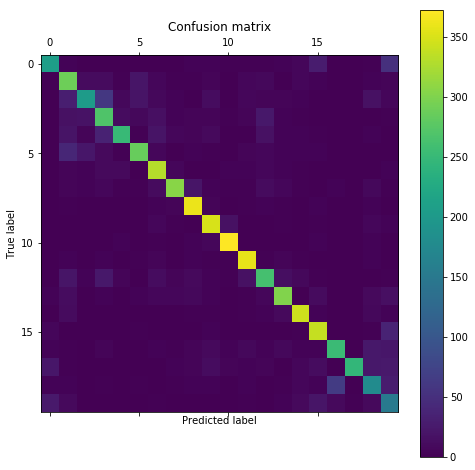

Start gridsearch fit
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 38.9min finished


                          precision    recall  f1-score   support

             alt.atheism       0.76      0.72      0.74       319
           comp.graphics       0.68      0.71      0.70       389
 comp.os.ms-windows.misc       0.69      0.65      0.67       394
comp.sys.ibm.pc.hardware       0.64      0.67      0.65       392
   comp.sys.mac.hardware       0.77      0.74      0.76       385
          comp.windows.x       0.83      0.70      0.76       395
            misc.forsale       0.77      0.82      0.80       390
               rec.autos       0.79      0.86      0.83       396
         rec.motorcycles       0.91      0.90      0.90       398
      rec.sport.baseball       0.76      0.90      0.83       397
        rec.sport.hockey       0.92      0.89      0.90       399
               sci.crypt       0.91      0.87      0.89       396
         sci.electronics       0.68      0.66      0.67       393
                 sci.med       0.83      0.78      0.80       396
         

<Figure size 432x288 with 0 Axes>

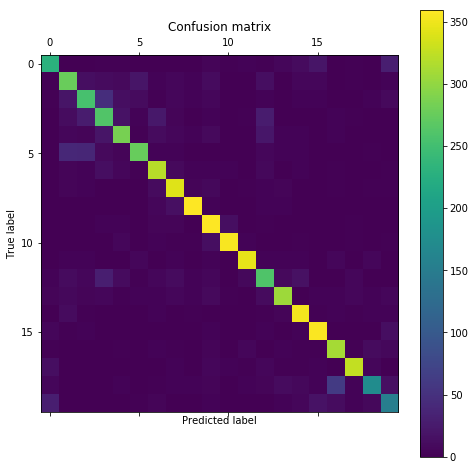


Best estimator found in grid search: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabular...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal'

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vect__analyzer,param_vect__lowercase,param_vect__max_features,param_vect__ngram_range,param_vect__stop_words,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.971701,0.076567,0.971202,0.052404,word,True,None,"(1, 1)",english,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.866902,0.871139,0.857774,0.866372,0.872727,0.866983,0.005205,4
1,5.228614,0.049477,1.022065,0.071781,word,True,None,"(1, 1)",None,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.827677,0.825684,0.836572,0.835841,0.826608,0.830476,0.004727,12
2,17.040220,0.621846,1.640612,0.062904,word,True,None,"(1, 2)",english,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.867342,0.874669,0.870583,0.870796,0.879379,0.872554,0.004128,1
3,21.855938,0.428099,2.294463,0.046996,word,True,None,"(1, 2)",None,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.823711,0.856134,0.836572,0.850000,0.853215,0.843927,0.012124,7
4,4.326827,0.198537,0.750991,0.015270,word,True,100,"(1, 1)",english,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.286470,0.273169,0.269876,0.295133,0.274058,0.279741,0.009539,38
5,4.873164,0.112987,0.896202,0.069289,word,True,100,"(1, 1)",None,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.193037,0.068844,0.147085,0.198230,0.209313,0.163302,0.051781,78
6,12.460670,0.167041,1.229709,0.074538,word,True,100,"(1, 2)",english,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.289555,0.285966,0.282244,0.294248,0.286475,0.287697,0.004015,37
7,14.912711,0.255308,1.664946,0.104041,word,True,100,"(1, 2)",None,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.201851,0.224184,0.141784,0.190708,0.180044,0.187714,0.027229,57
8,4.528886,0.101683,0.842545,0.074376,word,True,1000,"(1, 1)",english,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.719260,0.714916,0.726590,0.728761,0.704656,0.718837,0.008663,17
9,5.039719,0.095816,0.907971,0.068317,word,True,1000,"(1, 1)",None,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.605112,0.629744,0.672261,0.657080,0.643902,0.641620,0.023052,21



 Evaluation for SVM



C:\Users\elind\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


                          precision    recall  f1-score   support

             alt.atheism       0.75      0.72      0.73       319
           comp.graphics       0.67      0.72      0.70       389
 comp.os.ms-windows.misc       0.71      0.65      0.68       394
comp.sys.ibm.pc.hardware       0.63      0.67      0.65       392
   comp.sys.mac.hardware       0.73      0.78      0.76       385
          comp.windows.x       0.81      0.69      0.74       395
            misc.forsale       0.80      0.88      0.83       390
               rec.autos       0.84      0.83      0.84       396
         rec.motorcycles       0.89      0.93      0.91       398
      rec.sport.baseball       0.86      0.88      0.87       397
        rec.sport.hockey       0.93      0.93      0.93       399
               sci.crypt       0.89      0.90      0.89       396
         sci.electronics       0.68      0.68      0.68       393
                 sci.med       0.82      0.77      0.80       396
         

<Figure size 432x288 with 0 Axes>

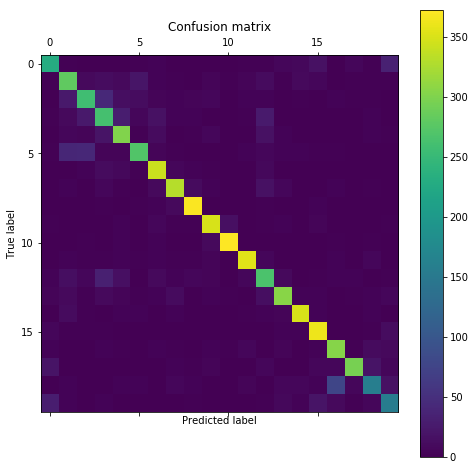

Start gridsearch fit
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 108.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 251.5min finished
C:\Users\elind\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


                          precision    recall  f1-score   support

             alt.atheism       0.81      0.75      0.78       319
           comp.graphics       0.70      0.77      0.73       389
 comp.os.ms-windows.misc       0.74      0.72      0.73       394
comp.sys.ibm.pc.hardware       0.67      0.70      0.68       392
   comp.sys.mac.hardware       0.78      0.81      0.80       385
          comp.windows.x       0.83      0.74      0.79       395
            misc.forsale       0.75      0.87      0.81       390
               rec.autos       0.88      0.87      0.87       396
         rec.motorcycles       0.93      0.94      0.93       398
      rec.sport.baseball       0.86      0.90      0.88       397
        rec.sport.hockey       0.92      0.95      0.94       399
               sci.crypt       0.93      0.91      0.92       396
         sci.electronics       0.74      0.74      0.74       393
                 sci.med       0.87      0.81      0.84       396
         

<Figure size 432x288 with 0 Axes>

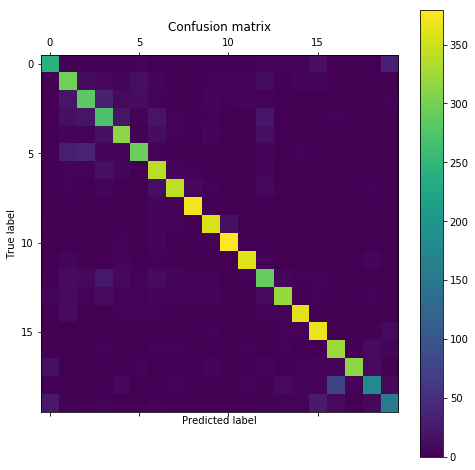


Best estimator found in grid search: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vect__analyzer,param_vect__lowercase,param_vect__max_features,param_vect__ngram_range,param_vect__stop_words,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,17.479845,1.291865,0.961029,0.042751,word,True,None,"(1, 1)",english,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.879242,0.887908,0.889576,0.892478,0.891353,0.888111,0.004699,6
1,24.286836,1.489516,1.016082,0.093880,word,True,None,"(1, 1)",None,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.876598,0.881289,0.885159,0.881416,0.882927,0.881478,0.002811,7
2,119.281141,20.118556,2.130502,0.243017,word,True,None,"(1, 2)",english,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.900837,0.909974,0.905035,0.904425,0.901996,0.904453,0.003160,1
3,181.668260,29.839470,2.934153,0.408223,word,True,None,"(1, 2)",None,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.895549,0.902471,0.898852,0.901327,0.904213,0.900482,0.003020,2
4,44.094651,7.478174,0.836563,0.039540,word,True,100,"(1, 1)",english,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.375496,0.374669,0.391784,0.379646,0.375166,0.379352,0.006465,49
5,77.199699,4.058449,0.873464,0.101542,word,True,100,"(1, 1)",None,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.288673,0.292145,0.288428,0.284956,0.283814,0.287603,0.002960,53
6,45.106146,1.105935,1.326253,0.100226,word,True,100,"(1, 2)",english,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.376377,0.368049,0.384717,0.378761,0.380044,0.377590,0.005490,50
7,93.110541,5.109489,1.773058,0.099431,word,True,100,"(1, 2)",None,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.252975,0.263019,0.276943,0.271239,0.288692,0.270574,0.012133,55
8,10.013815,0.364999,0.874861,0.062286,word,True,1000,"(1, 1)",english,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.691053,0.684025,0.708481,0.711504,0.702439,0.699500,0.010433,29
9,15.714765,0.635903,0.920538,0.078588,word,True,1000,"(1, 1)",None,"{'vect__analyzer': 'word', 'vect__lowercase': ...",0.670339,0.679170,0.677562,0.696018,0.678049,0.680228,0.008486,35


Wall time: 9h 49min 59s


<Figure size 432x288 with 0 Axes>

In [24]:
%%time
start_experiment()